<h1>ENB34 - CNNs</h1>
<h2> number of layers </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [27]:
net1 = models.Sequential()
net1.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net1.add(layers.MaxPooling1D(pool_size=2))
net1.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net1.add(layers.MaxPooling1D(pool_size=2))
net1.add(layers.Flatten())
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 239, 48)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 238, 48)           4656      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 119, 48)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5712)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 39991     
Total params: 45,271
Trainable params: 45,271
Non-trainable params: 0
__________________________________________________

In [5]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [6]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 60, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/60
54/54 [==============================] - 0s 2ms/step - loss: 1.9385 - accuracy: 0.1667 - val_loss: 1.7706 - val_accuracy: 0.2222
Epoch 2/60
54/54 [==============================] - 0s 687us/step - loss: 1.8638 - accuracy: 0.1667 - val_loss: 1.7506 - val_accuracy: 0.3333
Epoch 3/60
54/54 [==============================] - 0s 445us/step - loss: 1.7706 - accuracy: 0.3333 - val_loss: 1.6885 - val_accuracy: 0.2222
Epoch 4/60
54/54 [==============================] - 0s 445us/step - loss: 1.6903 - accuracy: 0.3333 - val_loss: 1.6219 - val_accuracy: 0.3333
Epoch 5/60
54/54 [==============================] - 0s 463us/step - loss: 1.6047 - accuracy: 0.5000 - val_loss: 1.5400 - val_accuracy: 0.3889
Epoch 6/60
54/54 [==============================] - 0s 445us/step - loss: 1.5301 - accuracy: 0.3704 - val_loss: 1.4599 - val_accuracy: 0.4444
Epoch 7/60
54/54 [==============================] - 0s 445us/step - loss: 1.4603 - accuracy: 0.4444 - v

54/54 [==============================] - 0s 463us/step - loss: 0.1621 - accuracy: 1.0000 - val_loss: 0.3368 - val_accuracy: 0.9444
Epoch 53/60
54/54 [==============================] - 0s 463us/step - loss: 0.1509 - accuracy: 1.0000 - val_loss: 0.3306 - val_accuracy: 0.9444
Epoch 54/60
54/54 [==============================] - 0s 445us/step - loss: 0.1434 - accuracy: 1.0000 - val_loss: 0.3235 - val_accuracy: 0.9444
Epoch 55/60
54/54 [==============================] - 0s 448us/step - loss: 0.1377 - accuracy: 1.0000 - val_loss: 0.3232 - val_accuracy: 0.9444
Epoch 56/60
54/54 [==============================] - 0s 445us/step - loss: 0.1362 - accuracy: 1.0000 - val_loss: 0.3294 - val_accuracy: 0.9444
Epoch 57/60
54/54 [==============================] - 0s 445us/step - loss: 0.1340 - accuracy: 1.0000 - val_loss: 0.3087 - val_accuracy: 0.9444
Epoch 58/60
54/54 [==============================] - 0s 445us/step - loss: 0.1174 - accuracy: 1.0000 - val_loss: 0.3069 - val_accuracy: 0.9444
Epoch 59/60

54/54 [==============================] - 0s 445us/step - loss: 0.1967 - accuracy: 1.0000 - val_loss: 1.1183 - val_accuracy: 0.6667
Epoch 45/60
54/54 [==============================] - 0s 445us/step - loss: 0.1726 - accuracy: 1.0000 - val_loss: 1.2116 - val_accuracy: 0.5556
Epoch 46/60
54/54 [==============================] - 0s 426us/step - loss: 0.1709 - accuracy: 1.0000 - val_loss: 1.1901 - val_accuracy: 0.6667
Epoch 47/60
54/54 [==============================] - 0s 463us/step - loss: 0.1601 - accuracy: 1.0000 - val_loss: 1.1486 - val_accuracy: 0.6667
Epoch 48/60
54/54 [==============================] - 0s 445us/step - loss: 0.1567 - accuracy: 1.0000 - val_loss: 1.1616 - val_accuracy: 0.6667
Epoch 49/60
54/54 [==============================] - 0s 445us/step - loss: 0.1435 - accuracy: 1.0000 - val_loss: 1.1576 - val_accuracy: 0.6667
Epoch 50/60
54/54 [==============================] - 0s 445us/step - loss: 0.1364 - accuracy: 1.0000 - val_loss: 1.1725 - val_accuracy: 0.6667
Epoch 51/60

In [7]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.48408486 0.83333334]
Standard deviation for loss & accuracy:  [0.04332765 0.03333333]
Duration in seconds:  6


In [8]:
net1.save('enb35-1.h5')

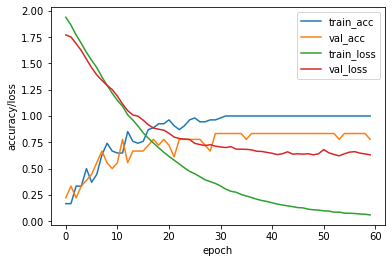

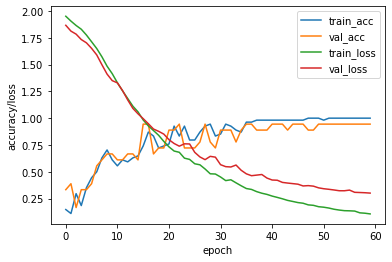

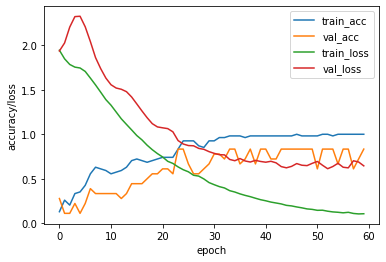

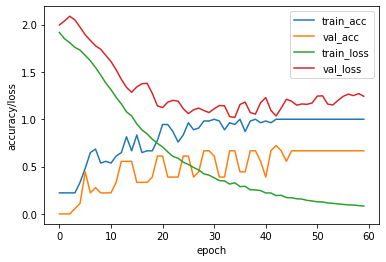

In [9]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [10]:
net2 = models.Sequential()
net2.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=2))
net2.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=2))
net2.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=2))
net2.add(layers.Flatten())
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 239, 48)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 238, 48)           4656      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 119, 48)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 118, 48)           4656      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 59, 48)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2832)             

In [11]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [12]:
histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 60, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/60
54/54 [==============================] - 0s 3ms/step - loss: 1.9646 - accuracy: 0.0926 - val_loss: 1.8903 - val_accuracy: 0.1667
Epoch 2/60
54/54 [==============================] - 0s 528us/step - loss: 1.9077 - accuracy: 0.1667 - val_loss: 1.8438 - val_accuracy: 0.2778
Epoch 3/60
54/54 [==============================] - 0s 519us/step - loss: 1.8781 - accuracy: 0.1667 - val_loss: 1.8131 - val_accuracy: 0.1667
Epoch 4/60
54/54 [==============================] - 0s 500us/step - loss: 1.8432 - accuracy: 0.2222 - val_loss: 1.7827 - val_accuracy: 0.3333
Epoch 5/60
54/54 [==============================] - 0s 519us/step - loss: 1.8096 - accuracy: 0.5185 - val_loss: 1.7482 - val_accuracy: 0.3333
Epoch 6/60
54/54 [==============================] - 0s 519us/step - loss: 1.7691 - accuracy: 0.4074 - val_loss: 1.7144 - val_accuracy: 0.1667
Epoch 7/60
54/54 [==============================] - 0s 541us/step - loss: 1.7313 - accuracy: 0.3148 - va

54/54 [==============================] - 0s 500us/step - loss: 0.0579 - accuracy: 1.0000 - val_loss: 0.6720 - val_accuracy: 0.8333
Epoch 59/60
54/54 [==============================] - 0s 500us/step - loss: 0.0488 - accuracy: 1.0000 - val_loss: 0.6611 - val_accuracy: 0.7778
Epoch 60/60
15/15 [==============================] - 0s 200us/step
[0.3227251470088959, 0.8666666746139526]
1
Train on 54 samples, validate on 18 samples
Epoch 1/60
54/54 [==============================] - 0s 538us/step - loss: 1.9696 - accuracy: 0.0741 - val_loss: 1.9514 - val_accuracy: 0.0000e+00
Epoch 2/60
54/54 [==============================] - 0s 538us/step - loss: 1.9517 - accuracy: 0.1481 - val_loss: 1.9136 - val_accuracy: 0.2222
Epoch 3/60
54/54 [==============================] - 0s 519us/step - loss: 1.9303 - accuracy: 0.1481 - val_loss: 1.8744 - val_accuracy: 0.2222
Epoch 4/60
54/54 [==============================] - 0s 482us/step - loss: 1.9121 - accuracy: 0.1481 - val_loss: 1.8402 - val_accuracy: 0.2222


54/54 [==============================] - 0s 500us/step - loss: 0.3338 - accuracy: 0.9444 - val_loss: 0.5866 - val_accuracy: 0.8889
Epoch 51/60
54/54 [==============================] - 0s 500us/step - loss: 0.3076 - accuracy: 0.9259 - val_loss: 0.5810 - val_accuracy: 0.8333
Epoch 52/60
54/54 [==============================] - 0s 482us/step - loss: 0.2861 - accuracy: 0.9630 - val_loss: 0.5380 - val_accuracy: 0.8333
Epoch 53/60
54/54 [==============================] - 0s 519us/step - loss: 0.2744 - accuracy: 0.9815 - val_loss: 0.5396 - val_accuracy: 0.8889
Epoch 54/60
54/54 [==============================] - 0s 519us/step - loss: 0.2607 - accuracy: 0.9630 - val_loss: 0.5544 - val_accuracy: 0.8889
Epoch 55/60
54/54 [==============================] - 0s 500us/step - loss: 0.2371 - accuracy: 0.9630 - val_loss: 0.4858 - val_accuracy: 0.8889
Epoch 56/60
54/54 [==============================] - 0s 500us/step - loss: 0.2618 - accuracy: 0.9815 - val_loss: 0.5255 - val_accuracy: 0.8333
Epoch 57/60

In [13]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [0.38877108 0.81666668]
Standard deviation for loss & accuracy:  [0.04148607 0.05527708]
Duration in seconds:  7


In [14]:
net1.save('enb34-2.h5')

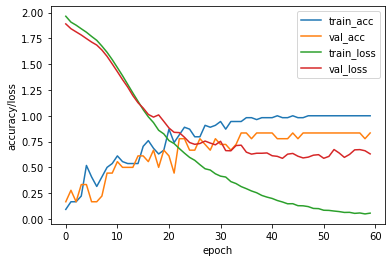

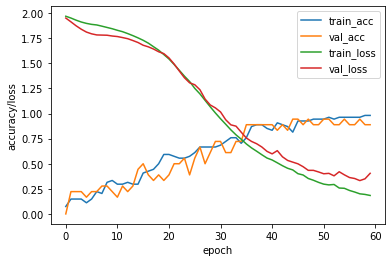

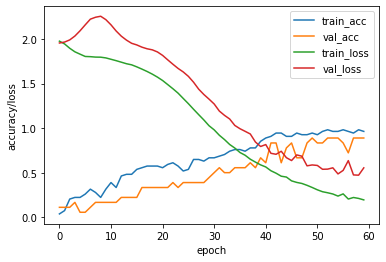

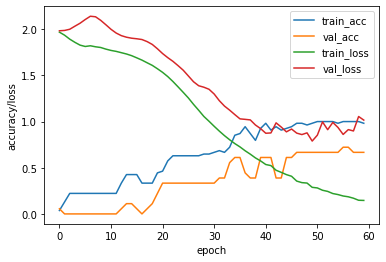

In [15]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [23]:
net3 = models.Sequential()
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Flatten())
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 239, 48)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 238, 48)           4656      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 119, 48)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 118, 48)           4656      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 59, 48)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 58, 48)           

In [24]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 70, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/70
54/54 [==============================] - 0s 4ms/step - loss: 1.9428 - accuracy: 0.1481 - val_loss: 1.8775 - val_accuracy: 0.5000
Epoch 2/70
54/54 [==============================] - 0s 764us/step - loss: 1.9134 - accuracy: 0.3148 - val_loss: 1.8505 - val_accuracy: 0.4444
Epoch 3/70
54/54 [==============================] - 0s 556us/step - loss: 1.8870 - accuracy: 0.4074 - val_loss: 1.8244 - val_accuracy: 0.2778
Epoch 4/70
54/54 [==============================] - 0s 538us/step - loss: 1.8663 - accuracy: 0.2407 - val_loss: 1.8042 - val_accuracy: 0.1111
Epoch 5/70
54/54 [==============================] - 0s 556us/step - loss: 1.8521 - accuracy: 0.1852 - val_loss: 1.7870 - val_accuracy: 0.1111
Epoch 6/70
54/54 [==============================] - 0s 556us/step - loss: 1.8257 - accuracy: 0.2037 - val_loss: 1.7493 - val_accuracy: 0.1667
Epoch 7/70
54/54 [==============================] - 0s 556us/step - loss: 1.7890 - accuracy: 0.2963 - va

54/54 [==============================] - 0s 575us/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.5489 - val_accuracy: 0.7778
Epoch 59/70
54/54 [==============================] - 0s 556us/step - loss: 0.0703 - accuracy: 1.0000 - val_loss: 0.5434 - val_accuracy: 0.8333
Epoch 60/70
54/54 [==============================] - 0s 538us/step - loss: 0.0638 - accuracy: 1.0000 - val_loss: 0.5681 - val_accuracy: 0.7778
Epoch 61/70
54/54 [==============================] - 0s 570us/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 0.5819 - val_accuracy: 0.7778
Epoch 62/70
54/54 [==============================] - 0s 538us/step - loss: 0.0525 - accuracy: 1.0000 - val_loss: 0.5182 - val_accuracy: 0.8333
Epoch 63/70
54/54 [==============================] - 0s 538us/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.5233 - val_accuracy: 0.7778
Epoch 64/70
54/54 [==============================] - 0s 538us/step - loss: 0.0484 - accuracy: 1.0000 - val_loss: 0.5552 - val_accuracy: 0.8333
Epoch 65/70

54/54 [==============================] - 0s 538us/step - loss: 1.1704 - accuracy: 0.6111 - val_loss: 1.6525 - val_accuracy: 0.3333
Epoch 31/70
54/54 [==============================] - 0s 553us/step - loss: 1.1276 - accuracy: 0.6667 - val_loss: 1.6235 - val_accuracy: 0.3333
Epoch 32/70
54/54 [==============================] - 0s 538us/step - loss: 1.0835 - accuracy: 0.6481 - val_loss: 1.5801 - val_accuracy: 0.3333
Epoch 33/70
54/54 [==============================] - 0s 538us/step - loss: 1.0486 - accuracy: 0.6481 - val_loss: 1.5333 - val_accuracy: 0.3333
Epoch 34/70
54/54 [==============================] - 0s 538us/step - loss: 0.9997 - accuracy: 0.6667 - val_loss: 1.4904 - val_accuracy: 0.3333
Epoch 35/70
54/54 [==============================] - 0s 593us/step - loss: 0.9618 - accuracy: 0.6852 - val_loss: 1.4579 - val_accuracy: 0.3333
Epoch 36/70
54/54 [==============================] - 0s 538us/step - loss: 0.9212 - accuracy: 0.7222 - val_loss: 1.4187 - val_accuracy: 0.3333
Epoch 37/70

In [25]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.44613032 0.83333334]
Standard deviation for loss & accuracy:  [0.19907491 0.03333333]
Duration in seconds:  9


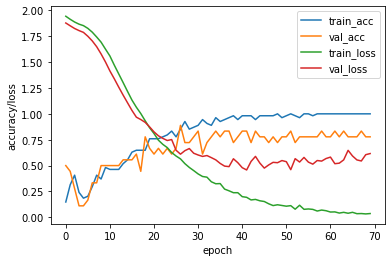

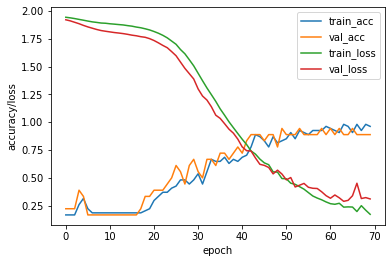

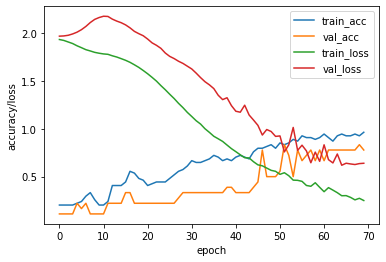

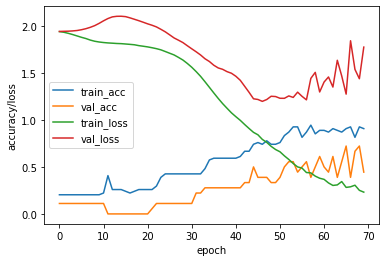

In [26]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [14]:
net3 = models.Sequential()
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Flatten())
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_4 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 240)               55296240  
_________________________________________________________________
dense_18 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_19 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 847       
Total params: 55,343,887
Trainable params: 55,343,887
Non-trainable params: 0
__________________________________________

In [15]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 2s 30ms/step - loss: 4.0274 - accuracy: 0.1667 - val_loss: 5.0610 - val_accuracy: 0.1667
Epoch 2/25
54/54 [==============================] - 1s 27ms/step - loss: 6.5335 - accuracy: 0.1296 - val_loss: 6.1429 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 1s 27ms/step - loss: 5.5996 - accuracy: 0.1111 - val_loss: 5.3485 - val_accuracy: 0.1111
Epoch 4/25
54/54 [==============================] - 1s 26ms/step - loss: 3.7186 - accuracy: 0.2037 - val_loss: 2.0583 - val_accuracy: 0.2222
Epoch 5/25
54/54 [==============================] - 1s 27ms/step - loss: 1.8932 - accuracy: 0.3148 - val_loss: 1.9089 - val_accuracy: 0.3889
Epoch 6/25
54/54 [==============================] - 1s 27ms/step - loss: 2.0365 - accuracy: 0.3333 - val_loss: 1.8732 - val_accuracy: 0.1111
Epoch 7/25
54/54 [==============================] - 1s 27ms/step - loss: 1.7289 - accuracy: 0.2778 - val_los

In [16]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.54580935 0.75000001]
Standard deviation for loss & accuracy:  [0.06449396 0.05527708]
Duration in seconds:  145


<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
